In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV files

In [2]:
members = pd.read_csv("members.csv")
songs = pd.read_csv("songs.csv")
song_extrainfo = pd.read_csv("song_extra_info.csv")
data = pd.read_csv("train.csv")

# Preprocessing

In [3]:
print(data.shape, members.shape, songs.shape, song_extrainfo.shape)

(7377418, 6) (34403, 7) (2296320, 7) (2295971, 3)


Merging dataframes into one

In [4]:
songs_info = pd.merge(songs,song_extrainfo)
all_data = pd.merge(data, songs_info, on='song_id', how='left')
all_data = pd.merge(all_data, members, on='msno', how='left')
all_data.shape

(7377418, 20)

Heatmap representation

<AxesSubplot:>

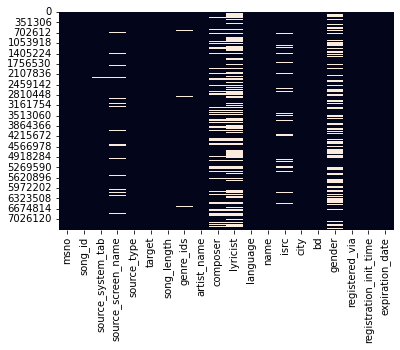

In [5]:
sns.heatmap(all_data.isna(), cbar=False)

Handling missing values 

In [13]:
# missing data percent
total = all_data.isna().sum().sort_values(ascending=False)
percent = (all_data.isna().sum()/all_data.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
lyricist,3179542,0.430983
gender,2961479,0.401425
composer,1676694,0.227274
isrc,577963,0.078342
source_screen_name,414804,0.056226
genre_ids,119906,0.016253
source_system_tab,24849,0.003368
source_type,21539,0.002920
language,1605,0.000218
name,1571,0.000213


In [14]:
all_data.isna().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
song_length                  1569
genre_ids                  119906
artist_name                  1569
composer                  1676694
lyricist                  3179542
language                     1605
name                         1571
isrc                       577963
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

In [15]:
all_data.source_system_tab.fillna('Others', inplace=True)
all_data.source_screen_name.fillna('Others', inplace=True)
all_data.source_type.fillna('Others', inplace=True)
all_data.gender.fillna('Unknown', inplace=True)
all_data.language.fillna(0.0, inplace=True)

all_data.drop(columns='composer', inplace=True)
all_data.drop(columns='lyricist', inplace=True)
all_data.drop(columns='isrc', inplace=True)

all_data.isna().sum()

msno                           0
song_id                        0
source_system_tab              0
source_screen_name             0
source_type                    0
target                         0
song_length                 1569
genre_ids                 119906
artist_name                 1569
language                       0
name                        1571
city                           0
bd                             0
gender                         0
registered_via                 0
registration_init_time         0
expiration_date                0
dtype: int64

In [17]:
all_data.dropna(inplace=True)
all_data.isna().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
language                  0
name                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [18]:
all_data.shape

(7257510, 17)

# EDA

Creating dates

In [ ]:
# registration_init_time
all_data.registration_init_time = pd.to_datetime(all_data.registration_init_time, format='%Y%m%d', errors='ignore')
all_data['registration_init_time_year'] = all_data['registration_init_time'].dt.year
all_data['registration_init_time_month'] = all_data['registration_init_time'].dt.month
all_data['registration_init_time_day'] = all_data['registration_init_time'].dt.day

# expiration_date
all_data.expiration_date = pd.to_datetime(all_data.expiration_date,  format='%Y%m%d', errors='ignore')
all_data['expiration_date_year'] = all_data['expiration_date'].dt.year
all_data['expiration_date_month'] = all_data['expiration_date'].dt.month
all_data['expiration_date_day'] = all_data['expiration_date'].dt.day

# Dates to category
all_data['registration_init_time'] = all_data['registration_init_time'].astype('category')
all_data['expiration_date'] = all_data['expiration_date'].astype('category')
all_data.shape